# Programming Assignment 3

## Note:
* Refer `ch07_Sparse_Kernel_Machines.ipynb` and `CSE474_SVM_example_code.zip` shared by the professor on UBLearns

## Section 1 : Sparse Kernel Machines using PRML

### 1a. Maximum Margin Classifiers
* Consider the given `x_train` and `y_train`
* `C` is the penalty parameter for misclassification. Plot the maximum margin classifier with C=0.05, C=0.1, and C=1 (example : SupportVectorClassifier(PolynomialKernel(degree=1), C=0.1))
* Explain your observations on 
    * how does `C` affect the margin and classification?

In [200]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from prml.kernel import (
    RBF,
    PolynomialKernel,
    SupportVectorClassifier
)

np.random.seed(1234)

In [207]:
x_train = np.array([[ 2.58, -2.94], [-2.44, -2.2 ], [ 0.76, -1.43], [ 0.5 ,  0.33], 
[-1.8 ,  0.94], [ 2.66, -0.86], [-2.81, -0.16], [-2.6 , -0.  ], [ 1.15, -2.54], 
[-1.62, -0.02], [ 0.26, -0.03], [ 1.81, -1.15], [-2.32,  0.36], [ 1.61, -0.39], 
[-2.5 ,  0.59], [ 2.08, -1.9 ], [ 2.48, -2.38], [-2.24, -2.98], [ 1.71,  0.36], 
[ 0.96,  0.13], [ 1.77, -1.49], [ 0.18, -2.66], [-2.18, -2.15], [ 0.98, -2.35], 
[ 1.54, -0.27], [ 1.16, -0.86], [ 1.61,  1.9 ], [ 2.56, -1.76], [ 0.61, -2.79], 
[-1.24, -2.75], [-2.42, -1.19], [-2.64,  0.5 ], [ 1.35,  1.5 ], [ 1.19, -2.32], 
[-1.28, -1.43], [-2.6 , -2.99], [-1.38, -2.8 ], [-0.19,  0.24], [-1.77, -1.63], 
[ 0.92, -2.88], [-1.2 , -0.12], [ 0.13,  2.75], [ 1.56,  1.82], [-1.02, -0.74], 
[ 1.12,  1.24], [-2.33, -1.39], [-2.82, -0.59], [-2.96,  1.01], [ 2.21, -0.75], 
[-1.31, -2.39]])

y_train = np.array([-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,1,-1,1,-1,1,1,-1,1,1,1,-1,-1,-1
,1,1,1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,-1,-1
,1,-1])


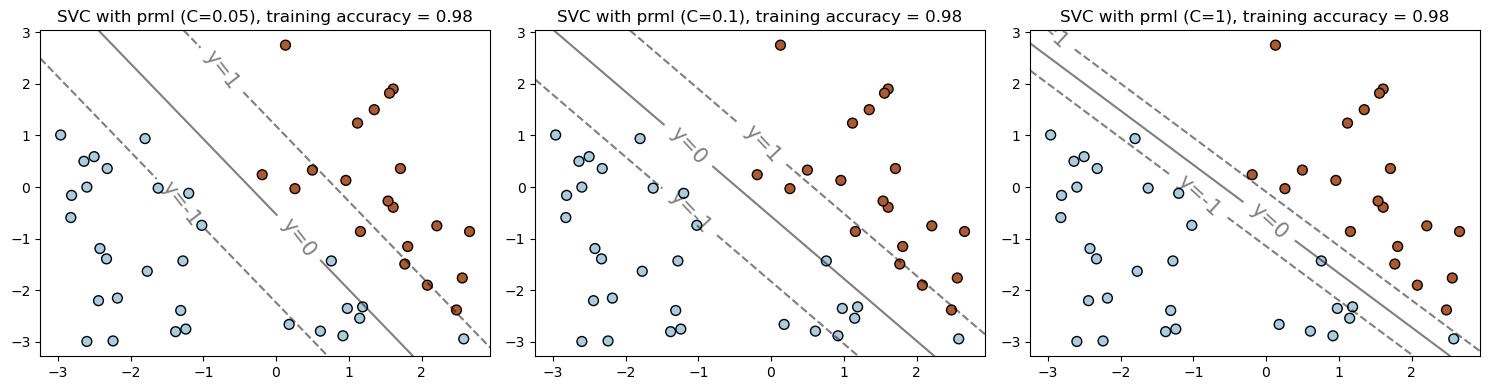

In [209]:
# your code goes here
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for i,C_val in enumerate([0.05, 0.1, 1]):
    model = SupportVectorClassifier(PolynomialKernel(degree=1), C = C_val)
    model.fit(x_train, y_train)

    #Training Accuracy
    y_pred = model.predict(x_train)
    accuracy = accuracy_score(y_train, y_pred)
    
    # Plot decision boundary and data points
    ax[i].scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=50)
    xlim = ax[i].get_xlim()
    ylim = ax[i].get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    Z = model.distance(x).reshape(xx.shape)
    cp = ax[i].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax[i].set_title(f'SVC with prml (C={C_val}), training accuracy = {accuracy}')
    ax[i].clabel(cp, fmt='y=%.f', inline=True, fontsize=15)

plt.tight_layout()
plt.show()

### 1a. Observations 

### 1b. Support Vector Classifier with RBF Kernel
* Consider the given `x_train` and `y_train`
* `C` is the penalty parameter for misclassification. Plot the maximum margin classifier with C=0.05, C=0.1, and C=1 (example : SupportVectorClassifier(RBF(), C=0.1))
* Explain your observations on 
    * how does `C` affect the margin and classification?

In [212]:
x_train = np.array([[-0.65, -0.37], [ 1.01, -0.22], [ 1.15, -1.91], [-2.19,  0.62], [-1.04, -0.63], 
[ 0.81,  0.02], [ 0.59,  0.24], [-1.98, -1.89], [-1.58, -0.2 ], [-0.24, -2.59], 
[-2.69,  0.05], [-1.5 , -1.29], [-1.5 , -1.63], [-0.89, -0.42], [-1.03, -3.47], 
[-2.13, -1.27], [-1.58, -0.69], [-0.61, -0.68], [-1.92, -3.25], [-1.29,  1.05], 
[-0.47, -0.57], [-1.51, -0.47], [-0.67, -1.59], [-0.57, -1.06], [-1.31,  0.01], 
[-0.66, -0.25], [-0.82, -1.92], [-0.74, -0.92], [-1.38, -2.3 ], [ 0.15, -4.28], 
[-2.36,  0.56], [-1.79, -0.65], [ 0.67, -0.32], [ 0.16, -1.45], [-0.4 , -0.81], 
[-3.15, -1.89], [-1.49, -2.02], [-2.89, -1.31], [-1.12, -0.17], [-1.93,  0.58], 
[-1.72, -0.33], [ 0.12,  0.17], [-0.86,  0.05], [-1.34, -1.84], [-1.61, -1.16], 
[-1.65, -1.23], [-1.43, -0.62], [-0.86, -1.04], [-1.89, -1.75], [-0.39,  1.08], 
[ 2.5 ,  0.81], [-0.36,  2.33], [-0.21,  0.53], [ 2.16, -0.48], [ 1.82,  1.07], 
[ 1.31,  2.82], [-0.25,  2.56], [ 1.96,  0.06], [ 0.82,  0.73], [ 1.3 ,  1.62], 
[-0.3 ,  1.02], [ 1.16,  2.33], [ 3.6 ,  1.4 ], [ 0.52,  0.9 ], [ 1.23,  0.13], 
[ 0.88,  0.24], [ 1.32,  1.34], [-0.14,  0.64], [ 0.39,  0.94], [ 2.09, -1.05], 
[ 1.42,  2.1 ], [ 1.22,  0.15], [-0.66, -0.02], [ 2.34,  1.85], [ 2.3 ,  1.05], 
[ 1.35,  1.09], [ 1.82,  0.53], [ 0.43,  1.06], [ 0.51,  0.64], [ 0.56,  0.76], 
[ 0.91,  0.38], [ 1.41,  1.2 ], [ 0.7 ,  1.68], [ 1.54,  0.39], [ 1.77,  3.06], 
[ 2.52,  1.39], [-0.44,  1.85], [ 0.55, -0.49], [ 1.21,  0.63], [ 0.03, -0.34], 
[-0.55,  1.31], [ 0.6 , -0.07], [ 1.  ,  2.1 ], [ 1.87, -0.76], [ 1.8 , -1.01], 
[ 2.19,  1.63], [ 0.94,  2.86], [ 1.03,  0.82], [ 1.61,  0.24], [ 0.65,  0.74]])

y_train = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
 -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
 -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
  1,  1,  1,  1])


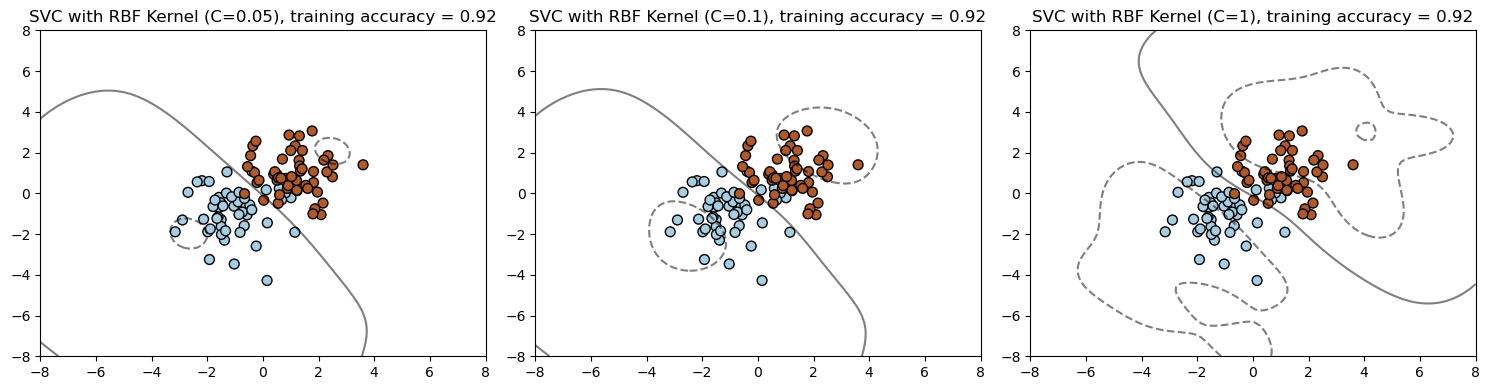

In [213]:
# your code goes here
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for i,C_val in enumerate([0.05, 0.1, 1]):
    model = SupportVectorClassifier(RBF(np.ones(3)), C = C_val) ##Check RBF.params
    model.fit(x_train, y_train)

    #Training Accuracy
    y_pred = model.predict(x_train)
    accuracy = accuracy_score(y_train, y_pred)
    
    # Plot decision boundary and data points
    ax[i].scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=50)
    # xlim = ax[i].get_xlim()
    # ylim = ax[i].get_ylim()
    xlim = [-8,8]
    ylim = [-8,8]
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    Z = model.distance(x).reshape(xx.shape)
    cp = ax[i].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax[i].set_title(f'SVC with RBF Kernel (C={C_val}), training accuracy = {accuracy}')
    # ax[i].clabel(cp, fmt='y=%.f', inline=True, fontsize=15)

plt.tight_layout()
plt.show()

### 1b. Observations

### 1c. Support Vector Classifier with Linear Kernel Vs RBF Kernel
* Consider the given `x_train` and `y_train` from `1b`
* Plot the maximum margin classifier using Linear Kernel (C=1) and RBF Kernel (C=1)
* Compare your plot with 1b and write your observations on 
    * Which kernel is better suited for this data and why?

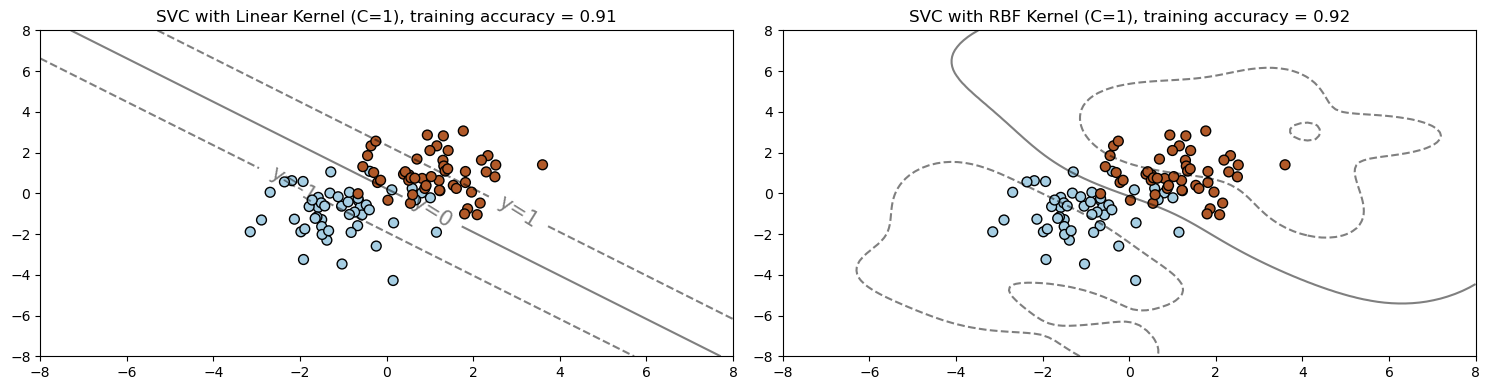

In [215]:
# your code goes here
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
for i in range(2):
    if i == 0:
        model = SupportVectorClassifier(PolynomialKernel(degree=1), C = 1)
    else:
        model = SupportVectorClassifier(RBF(np.ones(3)), C = 1) ##Check RBF.params
    model.fit(x_train, y_train)

    #Training Accuracy
    y_pred = model.predict(x_train)
    accuracy = accuracy_score(y_train, y_pred)
    
    # Plot decision boundary and data points
    ax[i].scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=50)
    # xlim = ax[i].get_xlim()
    # ylim = ax[i].get_ylim()
    xlim = [-8,8]
    ylim = [-8,8]
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    Z = model.distance(x).reshape(xx.shape)
    cp = ax[i].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    if i == 0:
        ax[i].set_title(f'SVC with Linear Kernel (C={1}), training accuracy = {accuracy}')
        ax[i].clabel(cp, fmt='y=%.f', inline=True, fontsize=15)
    else:
        ax[i].set_title(f'SVC with RBF Kernel (C={1}), training accuracy = {accuracy}')

plt.tight_layout()
plt.show()

### 1c. Observations

## Section 2: Linear Support Vector Machine

### 2a. Implement Linear SVM on the `wdbc.csv` dataset
* Import `wdbc.csv` as a pandas dataframe
* Select any two features as X and `target` as y
* Scale X values (refer: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* Split the dataset into train and test sets (refer: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* Implement linear support vector machine algorithm on the training set (refer: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* Plot the decision boundary
* Test the model on testset and calculate accuracy, precision, recall, F1 score, confusion matrix (refer: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

In [216]:
# your code goes here
pd.set_option('display.max_columns', None)
df = pd.read_csv("wdbc.csv")
df.head()

,target,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Accuracy: 0.96
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
Confusion Matrix:
[[41  2]
 [ 2 69]]


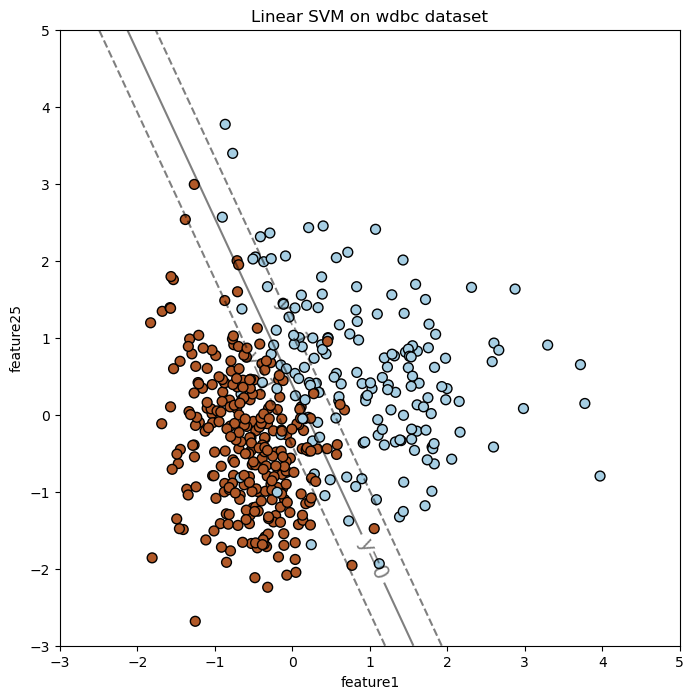

In [217]:
X = df[['feature1', 'feature25']]
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Plot decision boundary and data points
plt.figure(figsize=(8,8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=50)
xlim = [-3,5]
ylim = [-3,5]
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cp = plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title(f'Linear SVM on wdbc dataset')
plt.clabel(cp, fmt='y=%.f', inline=True, fontsize=15)
plt.xlabel('feature1')
plt.ylabel('feature25')


# Test the model on the test set
y_pred = svm_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

### 2b. Implement Linear SVM on the `wdbc.csv` dataset with PCA
* Import `wdbc.csv` as a pandas dataframe
* Select any two features as X and `target` as y
* Scale X values (refer: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* Perform Principal Component Analysis (PCA) and select first two components (refer: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
* Split the dataset into train and test sets (refer: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* Implement linear support vector machine algorithm on the training set (refer: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* Plot the decision boundary
* Test the model on testset and calculate accuracy, precision, recall, F1 score, confusion matrix (refer: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)
* Write your observations based on below:
    * What happens to the data when you perform PCA?
    * How did it affect the SVM performance compared to 2a?

Accuracy: 0.99
Precision: 0.99
Recall: 1.00
F1 Score: 0.99
Confusion Matrix:
[[42  1]
 [ 0 71]]


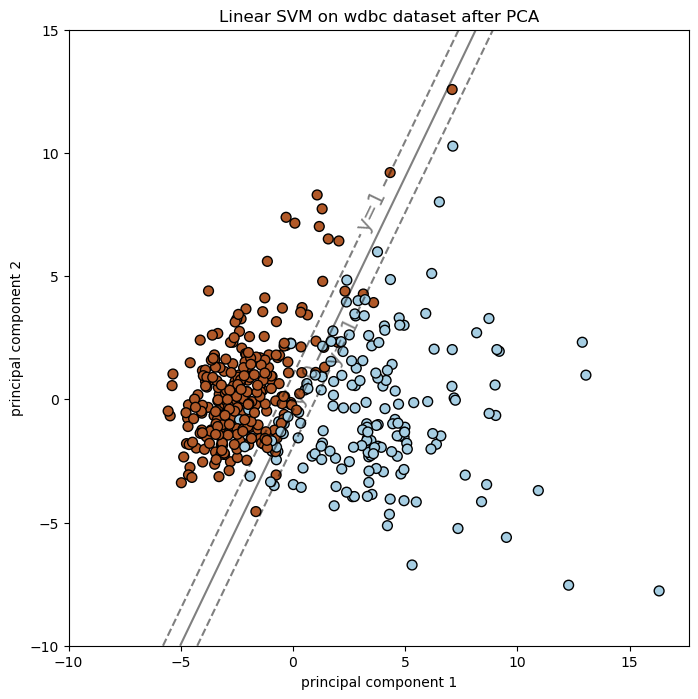

In [218]:
# your code goes here
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Implement linear support vector machine algorithm
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Plot decision boundary and data points
plt.figure(figsize=(8,8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=50)
xlim = [-10,15]
ylim = [-10,15]
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cp = plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title(f'Linear SVM on wdbc dataset after PCA')
plt.clabel(cp, fmt='y=%.f', inline=True, fontsize=15)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')


# Test the model on the test set
y_pred = svm_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

### Observations 2b

### 2c. Implement Linear SVM on the `wdbc.csv` dataset with LDA
* Import `wdbc.csv` as a pandas dataframe
* Select any two features as X and `target` as y
* Scale X values (refer: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* Perform linear Discriminant Analysis and select the first component (refer : https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#)
* Split the dataset into trainset and testset (refer: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* Implement linear support vector machine algorithm on the training set (refer: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* Test the model on testset and calculate accuracy, precision, recall, F1 score, confusion matrix (refer: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)
* Write your observations based on below:
    * What happens to the data when you perform LDA?
    * How did it affect the SVM performance compared to 2a?
    * How did it affect the SVM performance compared to 2b?

In [219]:
#your code goes here
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

# Implement linear support vector machine algorithm
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Test the model on the test set
y_pred = svm_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.97
Precision: 0.97
Recall: 0.99
F1 Score: 0.98
Confusion Matrix:
[[41  2]
 [ 1 70]]


### Observations 2c

## Section 3: Non-Linear SVM

### 3a. Implement Non-Linear SVM on the `data.csv` dataset
* Import `data.csv` as a pandas dataframe
* Select any two features as X and `Class` as y
* Scale X values (refer: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* Split the dataset into train and test sets (refer: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* Implement non-linear support vector machine algorithm on the training set (refer: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC or https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
* Plot the decision boundary
* Test the model on testset and calculate accuracy, precision, recall, F1 score, confusion matrix (refer: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

In [226]:
# your code goes here
pd.set_option('display.max_columns', None)
df = pd.read_csv("data.csv")
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,1
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,1
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,1
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,1
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,1


In [227]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.0000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121,0.0400
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067,0.9994
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800,-1.0000
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475,-1.0000
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700,1.0000
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500,1.0000
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900,1.0000


Accuracy: 0.81
Precision: 0.78
Recall: 0.85
F1 Score: 0.82
Confusion Matrix:
[[190  59]
 [ 37 214]]


/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/var/folders/0h/7dyys8gd717907nbp0w_2vl80000gn/T/ipykernel_5577/2991100557.py:20: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='x', s=6)


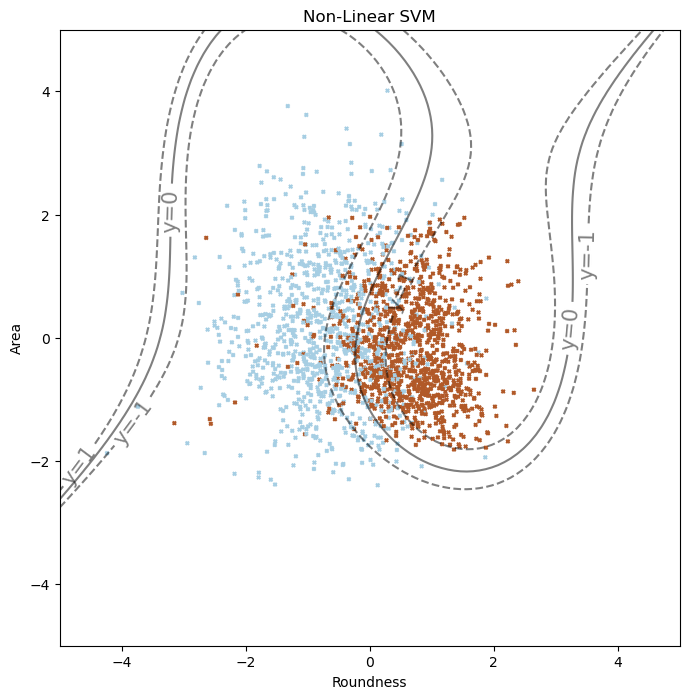

In [236]:
X = df[['Roundness', 'Area']]
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# svm_model = SVC(kernel="poly", degree=5, coef0=1, C=5)

svm_model = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scalar", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge")) #hinge applies Stochastic Gradient Descent
))
svm_model.fit(X_train, y_train)

# Plot decision boundary and data points
plt.figure(figsize=(8,8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='x', s=6)
xlim = [-5,5]
ylim = [-5,5]
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cp = plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title(f'Non-Linear SVM')
plt.clabel(cp, fmt='y=%.f', inline=True, fontsize=15)
plt.xlabel('Roundness')
plt.ylabel('Area')


# Test the model on the test set
y_pred = svm_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

### 3b. Implement Non-Linear SVM on the `data.csv` dataset with PCA
* Import `data.csv` as a pandas dataframe
* Select any two features as X and `Class` as y
* Scale X values (refer: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* Perform Principal Component Analysis (PCA) and select first two components (refer: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
* Split the dataset into train and test sets (refer: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* Implement non-linear support vector machine algorithm on the training set (refer: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
* Plot the decision boundary
* Test the model on testset and calculate accuracy, precision, recall, F1 score, confusion matrix (refer: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)
* How did PCA affect the SVM performance compared to 3a?

In [233]:
# your code goes here
X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

svm_model = Pipeline((
    ("poly_features", PolynomialFeatures(degree=4)),
    ("scalar", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge")) #hinge applies Stochastic Gradient Descent
))
svm_model.fit(X_train, y_train)

# Test the model on the test set
y_pred = svm_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.84
Precision: 0.79
Recall: 0.92
F1 Score: 0.85
Confusion Matrix:
[[188  61]
 [ 21 230]]


/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Observations 3b

### 3c. Implement Non-Linear SVM on the `data.csv` dataset with LDA
* Import `data.csv` as a pandas dataframe
* Select any two features as X and `Class` as y
* Scale X values (refer: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* Perform Linear Discriminant Analysis (LDA) and select first component (refer : https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#)
* Split the dataset into train and test sets (refer: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* Implement non-linear support vector machine algorithm on the training set (refer: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
* Plot the decision boundary
* Test the model on testset and calculate accuracy, precision, recall, F1 score, confusion matrix (refer: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)
* How did LDA affect the SVM performance compared to 3a and 3b?

In [184]:
# your code goes here
X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

svm_model = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scalar", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge")) #hinge applies Stochastic Gradient Descent
))
svm_model.fit(X_train, y_train)

# Test the model on the test set
y_pred = svm_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.85
Precision: 0.81
Recall: 0.92
F1 Score: 0.86
Confusion Matrix:
[[194  55]
 [ 20 231]]


/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pratik/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Observations 3c

### 3d. Implement Linear SVM on the `data.csv` dataset
* Import `data.csv` as a pandas dataframe
* Select any two features as X and `Class` as y
* Scale X values (refer: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* Split the dataset into train and test sets (refer: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* Implement linear support vector machine algorithm on the training set
* Plot the decision boundary
* Test the model on testset and calculate accuracy, precision, recall, F1 score, confusion matrix (refer: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)
* Write your observations about linear kernel vs Non-linear kernel for this data and which one do you think is better and why?

Accuracy: 0.81
Precision: 0.78
Recall: 0.85
F1 Score: 0.82
Confusion Matrix:
[[189  60]
 [ 37 214]]


/var/folders/0h/7dyys8gd717907nbp0w_2vl80000gn/T/ipykernel_5577/4181046337.py:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='x', s=6)


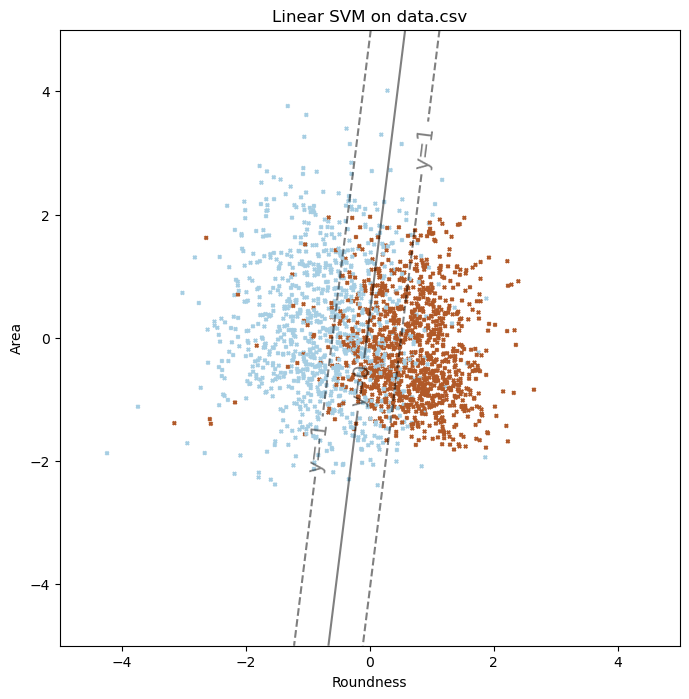

In [235]:
# your code goes here
X = df[['Roundness', 'Area']]
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Plot decision boundary and data points
plt.figure(figsize=(8,8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', marker='x', s=6)
xlim = [-5,5]
ylim = [-5,5]
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cp = plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title(f'Linear SVM on data.csv')
plt.clabel(cp, fmt='y=%.f', inline=True, fontsize=15)
plt.xlabel('Roundness')
plt.ylabel('Area')


# Test the model on the test set
y_pred = svm_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

### Observations 3d